In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from clean import clean_dataset

In [2]:
data = pd.read_csv("dataset/heart_2022_with_nans.csv")

In [3]:
print("Initial data shape: ", data.shape)

Initial data shape:  (445132, 40)


In [11]:
numerical_columns = data.select_dtypes(include=['number']).columns
print(numerical_columns)

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')


In [23]:
def sns_plot(numeric_list, data, type):
    features = [col for col in numeric_list if col != 'GeneralHealth']

    n_features = len(features)
    n_cols = 4  # Number of columns in the grid
    n_rows = (n_features + n_cols - 1) // n_cols  # Number of rows required

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(56, 5 * n_rows))
    axes = axes.flatten()

    # Loop over the features and create plots
    if type=="box":
        for i, feature in enumerate(features):
            sns.boxplot(ax=axes[i], x="GeneralHealth", y=feature, data=data, palette="Set2")
            axes[i].set_title(f"{feature} vs General Health")
    elif type=="violin":
        for i, feature in enumerate(features):
            sns.violinplot(ax=axes[i], x="GeneralHealth", y=feature, data=data, palette="Set2")
            axes[i].set_title(f"{feature} vs General Health")
    elif type=="histogram":
        for i, feature in enumerate(features):
            sns.histplot(ax=axes[i], x=feature, data=data, hue="GeneralHealth", palette="Set2", kde=True)
            axes[i].set_title(f"{feature} vs General Health")
    elif type=="correlation":
        sns.heatmap(data[features].corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0])
        axes[0].set_title("Correlation Matrix")
        i=0
    elif type=="":


    # Delete any remaining unused axes if number of plots is less than grid size
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    

In [15]:
def compute_stats(numerical_columns,data):
    for col in numerical_columns:
        print(f"Feature: {col}")
        print(f"Mean: {data[col].mean()}")
        print(f"Median: {data[col].median()}")
        print(f"Mode: {data[col].mode()[0]}")
        print(f"Standard Deviation: {data[col].std()}")
        print(f"Variance: {data[col].var()}")
        print(f"Minimum: {data[col].min()}")
        print(f"Maximum: {data[col].max()}")
        print(f"Skewness: {data[col].skew()}")
        print(f"Kurtosis: {data[col].kurt()}")
        print("\n")

### Box Plots ###

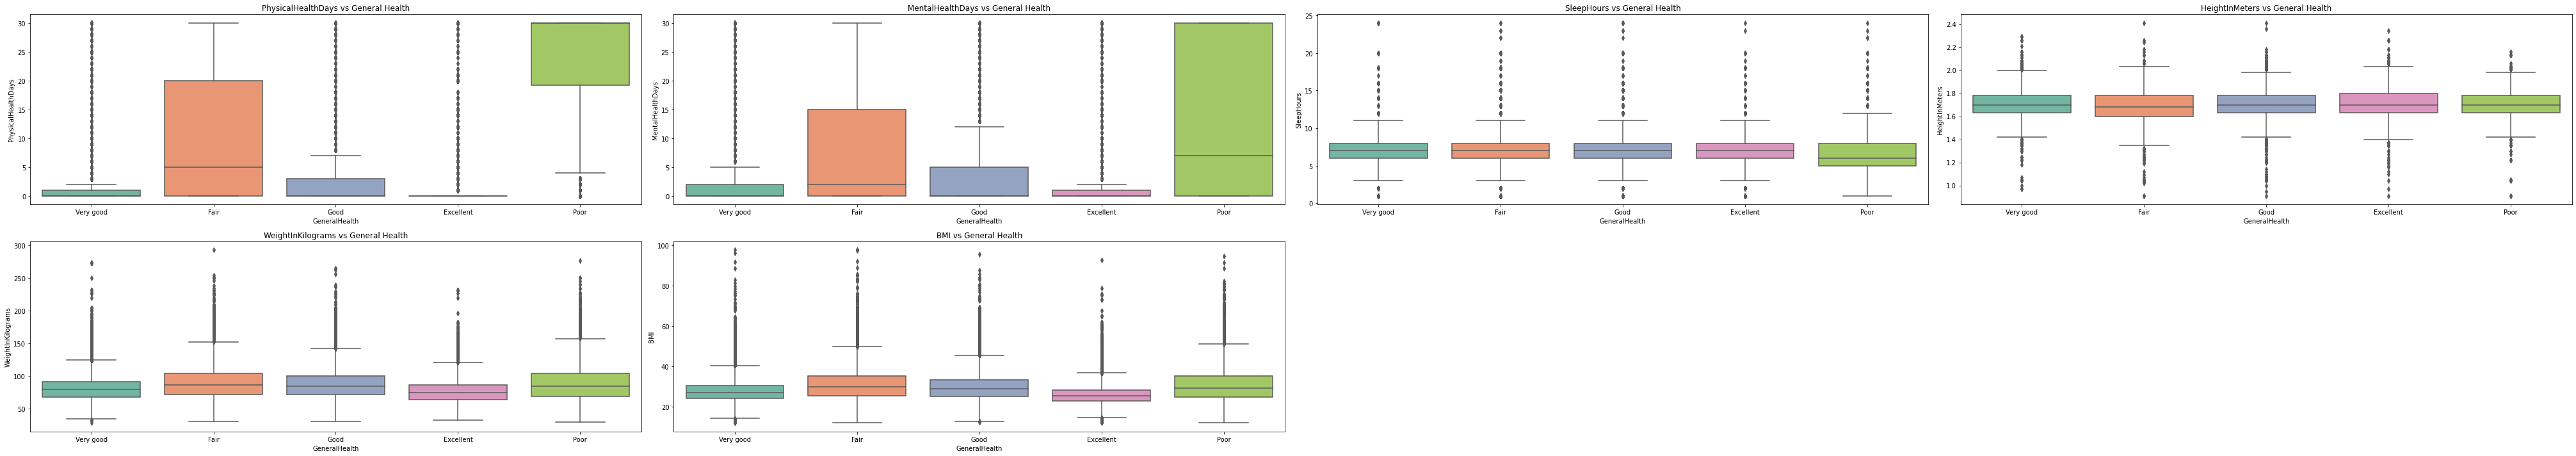

In [16]:
sns_plot(numerical_columns, data, "box")

### Violin Plots ###

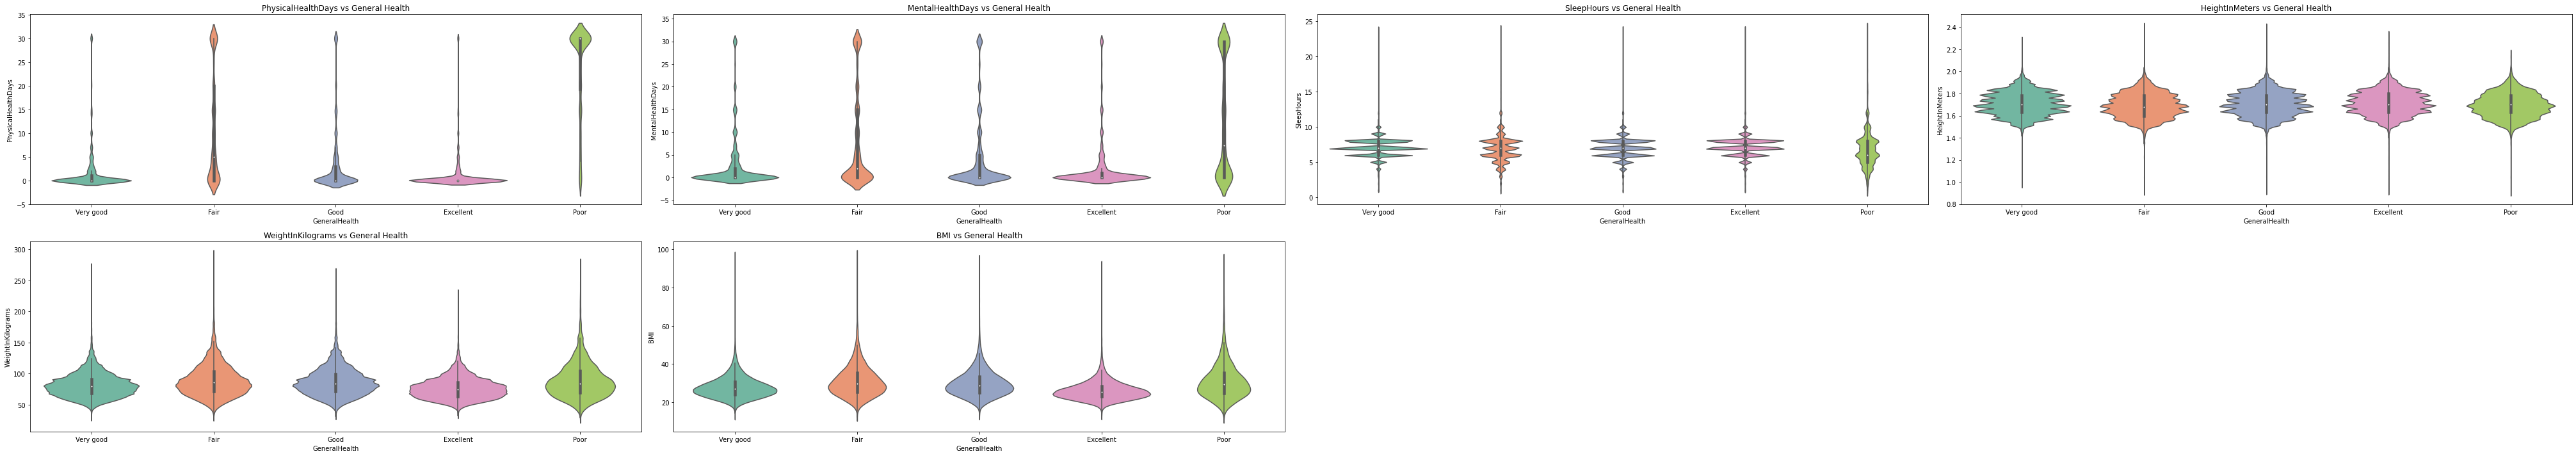

In [17]:
sns_plot(numerical_columns, data, "violin")

### Histogram ###

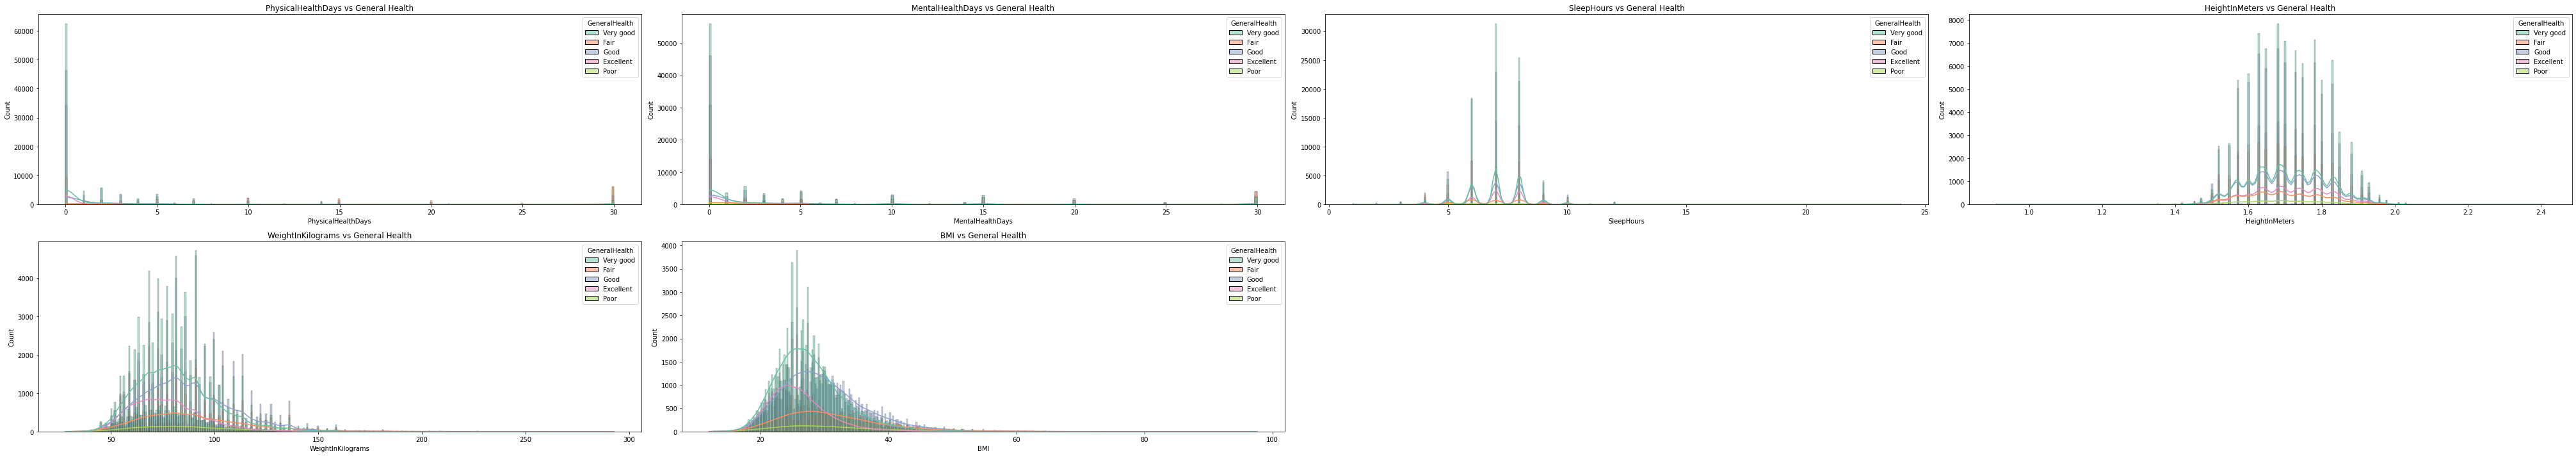

In [18]:
sns_plot(numerical_columns, data, "histogram")  

### Correlation Heatmap ###

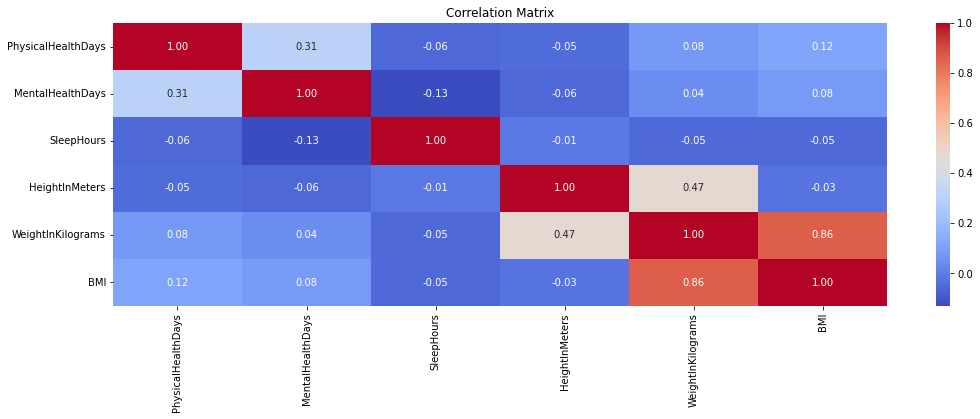

In [22]:
sns_plot(numerical_columns, data, "correlation")